## PMF

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Import data

# Training Data
df_train=pd.read_csv('./ua.base',sep='\t',header=None,engine='python')

# Test Data
df_test=pd.read_csv('./ua.test',sep='\t',header=None,engine='python')

In [3]:
num_user=943
num_item=1682

In [4]:
# user-item matrix
def rating_matrix(df):
    R=np.zeros((num_user,num_item))
    df.columns=['user_id','item_id','rating','timestamp']
    for index in range(len(df)):
        u=df['user_id'][index]-1
        i=df['item_id'][index]-1
        R[u,i]=df['rating'][index]
    return R

In [5]:
# evaluation using RMSE
# Test Set에서 rating이 이루어진 항목들에 대해 rmse 계산
def rmse(A,B):
    num_rating=0
    rmse=0
    for i in range(num_user):
        for j in range(num_item):
            if A[i,j]>0:
                rmse+=(A[i,j]-B[i,j])**2
                num_rating+=1
    return (rmse/num_rating)**(0.5)

In [6]:
# Transform dataframe to user-item matrix
R_train=rating_matrix(df_train) # Training Data
R_test=rating_matrix(df_test) # Test Data

In [7]:
# user vector in constrained PMF
def U(i):
    numerator=0
    denominator=0
    for m,k,r in samples:
        denominator+=1
        numerator+=W[k,:]
    return Y[i,:]+numerator/denominator

In [8]:
# rating
def rating(i,j):
    return U(i)@Q[j,:].T

In [12]:
# initial values
rmse_pmf=[]
K=30
Y=np.random.normal(scale=1.0/K,size=(num_user,K))
Q=np.random.normal(scale=1.0/K,size=(num_item,K))
W=np.random.normal(scale=1.0/K,size=(num_item,K))

In [13]:
# sample where rating is given in training data
samples=[(i,j,R_train[i,j]) for i in range(num_user) for j in range(num_item) if R_train[i,j]>0]

In [19]:
# training procedure of constrained PMF
for epoch in range(10):
    for i,j,r in samples:
        prediction=rating(i,j)
        e=r-prediction
        Y[i,:]+=0.002*(e*Q[j,:]-0.002*Y[i,:]) # Y vector
        Q[j,:]+=0.002*(e*U(i)-0.002*Q[j,:]) # Item vector
        W[j,:]+=0.002*(e/len(samples)*Q[j,:]-0.002*W[j,:]) # W vector

    U_mat=np.random.normal(scale=1.0/K,size=(num_user,K)) # User vector
    for k in range(num_user):
        U_mat[k,:]=U(k)
    R_result=U_mat@Q.T
    rmse_pmf.append(rmse(R_test,R_result))

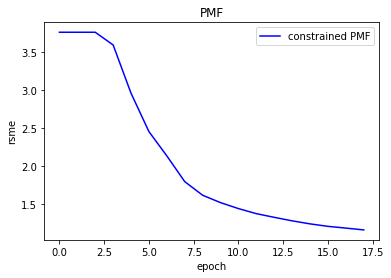

In [21]:
# plot
epoch=[i for i in range(18)]
plt.plot(epoch,rmse_pmf,'b') # rmse plot for constrained PMF
plt.xlabel('epoch')
plt.ylabel('rsme')
plt.legend(['constrained PMF'])
plt.title('PMF')
plt.show()